# C2 M1 Exp Ensemble
**Course**: Course 2 (Master Class)
**Workflow**: `data-notebook-refiner`

---


In [ ]:
# 🔧 Setup & Imports
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



# Experiment 01: Ensemble Method Comparison (Bagging vs Boosting)
**Goal**: Random Forest와 XGBoost의 성능 및 과적합 패턴을 비교 분석합니다.


In [1]:


# 가상의 복잡한 데이터 생성 (n_features=20, n_informative=15)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data Shape:", X_train.shape, X_test.shape)


Data Shape: (700, 20) (300, 20)



## 1. Break: XGBoost Overfitting Simulation
**시나리오**: `max_depth`를 매우 깊게 설정하고, `n_estimators`를 늘려서 훈련 데이터에 과적합시킵니다.


/Users/bagjongman/dev/workspace/study/python/study_machine_learning/.venv/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [11:34:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


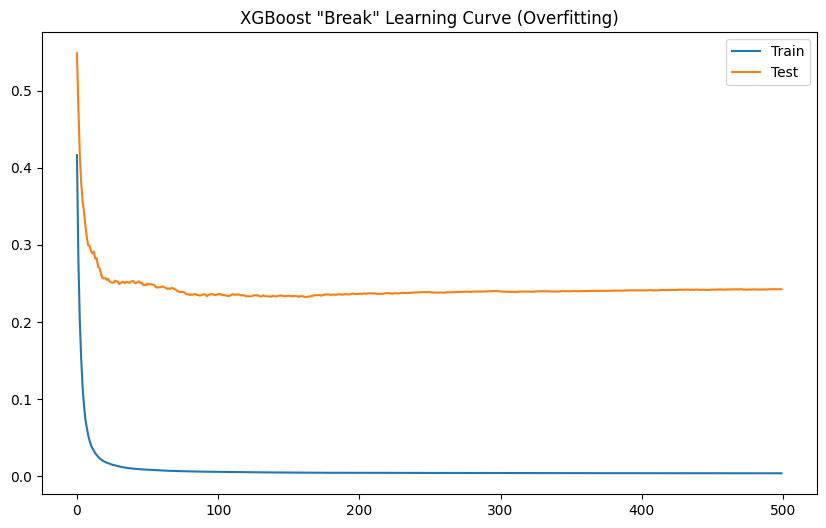

Train Accuracy: 1.0
Test Accuracy: 0.8933333333333333


In [2]:

# Break: Overfitting Params
# max_depth=10 (너무 깊음), eta(learning_rate)=0.3 (기본값)
xgb_break = XGBClassifier(n_estimators=500, max_depth=15, learning_rate=0.5, 
                          eval_metric='logloss', use_label_encoder=False)

eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_break.fit(X_train, y_train, eval_set=eval_set, verbose=False)

results = xgb_break.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Visualization
plt.figure(figsize=(10,6))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test')
plt.legend()
plt.title('XGBoost "Break" Learning Curve (Overfitting)')
plt.show()

print("Train Accuracy:", accuracy_score(y_train, xgb_break.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, xgb_break.predict(X_test)))



## 2. Fix: Random Forest Stability
**시나리오**: Random Forest는 깊이가 깊어져도 Bagging의 특성상 과적합에 상대적으로 강합니다.


In [3]:

# Fix: Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

print("RF Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("RF Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))
# Insight: RF는 XGBoost Break 모델보다 Test Accuracy가 높거나, Train-Test 격차가 적을 것으로 예상됨.


RF Train Accuracy: 1.0
RF Test Accuracy: 0.8866666666666667



---
## 📝 Key Takeaways & Insights
*   **What did we learn?**
    *   (여기에 핵심 배운 점을 기록하세요)
*   **Next Steps**:
    *   (다음 학습 단계)
